Exception ignored in: 'pyCalc.cError'
ValueError: <invalid operation: colwise* >left is a 4x1 matrix but right is a 4x1 matrix


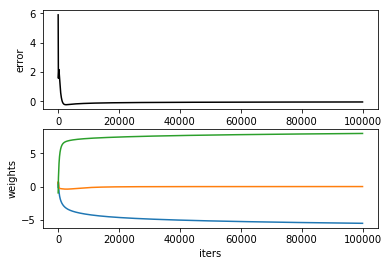

In [1]:
import numpy as np
import pyCalc as p
import random
p.setMode("quiet")
xs = p.var("constant",np.array([
                                   [1,0,0],
                                   [1,1,0],
                                   [1,0,1],
                                   [1,1,1]
                               ]
                               , dtype= float))
ys = p.var("constant", np.array(
                                [0,0,5,5]
                                , dtype=float))
np.random.seed(1)
weights =2*np.random.random((3,1)) - 1
ws = p.var("independent", 3,1)

l0 = p.function(xs,ws, "*") #4x1
l1 = p.function(l0, "sigmoid") #4x1

weights2 =np.array([ 2.5 ] , dtype= float)
ws2 = p.var("independent", 1,1)

l2 = p.function(l1,ws2, "*") #4x1
l2_error = p.function(ys.T(), l2, "-")



tmp2 = p.function(l1.T(),l2_error, "*")

sig = p.function(l1, "sigmoid_r")
l1_delta = p.function(sig, l2_error, "colwise*")
l1_delta2 = p.function(xs.T(),l1_delta, "*")

tmp = p.function(l1_delta2,ws2, "*")

tmp.value(dict([(ws,weights), (ws2, weights2)]))
g= []
h = []
for i in range(100000):
    t0 = weights + 0.01*tmp.value(dict([(ws,weights), (ws2, weights2)]))
    t1 = weights2 + 0.001*tmp2.value(dict([(ws,weights), (ws2, weights2)]))
    weights = t0
    weights2 = t1
    g.append(np.sum(l2_error.value(dict([(ws,weights), (ws2, weights2)]))))
    h.append(weights.tolist())


import matplotlib.pyplot as plt
x_data = [i for i in range(len(g))]
y_data = [[h[i][j] for i in range(len(h))] for j in range(len(h[0]))]
plt.figure(1)
plt.subplot(211)
plt.ylabel('error')
plt.xlabel('iters')
plt.plot(x_data, g, 'k')

plt.subplot(212)
plt.ylabel('weights')
plt.xlabel('iters')
for d in y_data:
    plt.plot(x_data, d)

plt.show()

In [2]:
l2.value(dict([(ws,weights), (ws2, weights2)]))

array([[ 0.020933  ],
       [ 0.02086294],
       [ 5.0002096 ],
       [ 4.99888689]])

In [3]:
weights2

array([[ 5.42610157]])

In [4]:
l2_error.value(dict([(ws,weights), (ws2, weights2)]))

array([[-0.020933  ],
       [-0.02086294],
       [-0.0002096 ],
       [ 0.00111311]])

In [5]:
l1.value(dict([(ws,weights), (ws2, weights2)]))

array([[ 0.00385783],
       [ 0.00384492],
       [ 0.92151051],
       [ 0.92126674]])

In [6]:
l2.value(dict([(ws,weights), (ws2, weights2)]))

array([[ 0.020933  ],
       [ 0.02086294],
       [ 5.0002096 ],
       [ 4.99888689]])

In [7]:
xs = p.var("constant",np.array([
                                   [5,0,0],
                                   [1,5,0],
                                   [1,0,5],
                                   [5,1,1]
                               ]
                               , dtype= float))
ys = p.var("constant", np.array(
                                [17,3,-6,5]
                                , dtype=float))
ys.value()

array([[ 17.,   3.,  -6.,   5.]])

Exception ignored in: 'pyCalc.cError'
ValueError: <invalid operation: colwise* >left is a 100x1 matrix but right is a 100x1 matrix


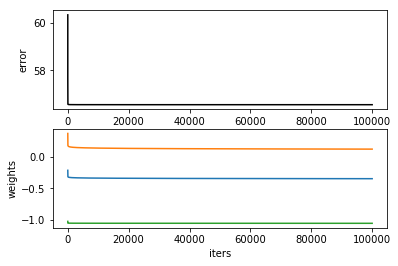

In [8]:
from math import exp
import numpy as np
import pyCalc as p
import random
p.setMode("quiet")
xxx = [[random.randint(1,101),random.randint(1,101),random.randint(1,101)] for x in range(100)]
xs = p.var("constant",np.array(xxx
                               , dtype= float))

yy = [3*(1/(1+exp(-2*d[0]+3*d[1]+d[2]))) for d in xxx]
ys = p.var("constant",np.array(yy
                               , dtype= float))

np.random.seed(1)
weights =2*np.random.random((3,1)) - 1
ws = p.var("independent", 3,1)

l0 = p.function(xs,ws, "*") #4x1
l1 = p.function(l0, "sigmoid") #4x1

weights2 =2*np.random.random((1,1)) - 1
ws2 = p.var("independent", 1,1)

l2 = p.function(l1,ws2, "*") #4x1
l2_error = p.function(ys.T(), l2, "-")



tmp2 = p.function(l1.T(),l2_error, "*")

sig = p.function(l1, "sigmoid_r")
l1_delta = p.function(sig, l2_error, "colwise*")
l1_delta2 = p.function(xs.T(),l1_delta, "*")

tmp = p.function(l1_delta2,ws2, "*")

tmp.value(dict([(ws,weights), (ws2, weights2)]))
g= []
h = []
for i in range(100000):
    t0 = weights + 0.01*tmp.value(dict([(ws,weights), (ws2, weights2)]))
    t1 = weights2 + 0.001*tmp2.value(dict([(ws,weights), (ws2, weights2)]))
    weights = t0
    weights2 = t1
    g.append(np.sum(l2_error.value(dict([(ws,weights), (ws2, weights2)]))))
    h.append(weights.tolist())


import matplotlib.pyplot as plt
x_data = [i for i in range(len(g))]
y_data = [[h[i][j] for i in range(len(h))] for j in range(len(h[0]))]
plt.figure(1)
plt.subplot(211)
plt.ylabel('error')
plt.xlabel('iters')
plt.plot(x_data, g, 'k')

plt.subplot(212)
plt.ylabel('weights')
plt.xlabel('iters')
for d in y_data:
    plt.plot(x_data, d)

plt.show()

In [9]:
weights

array([[-0.34774525],
       [ 0.12021718],
       [-1.05400216]])

In [10]:
l2_error.value(dict([(ws,weights), (ws2, weights2)]))

array([[  2.81560055e-49],
       [  5.78822144e-43],
       [  1.04491732e-20],
       [  1.50714574e-20],
       [  1.32690308e-10],
       [  3.00000000e+00],
       [  1.37092974e-27],
       [  5.14172529e-15],
       [  2.02406645e-11],
       [  1.02027781e-14],
       [  3.58177298e-43],
       [  2.99999908e+00],
       [  3.00000000e+00],
       [  5.92259781e-13],
       [  9.10612737e-26],
       [  9.56964098e-09],
       [  1.31524619e-47],
       [  3.00000000e+00],
       [  1.85173384e-23],
       [  9.18698391e-40],
       [  6.51156603e-29],
       [  1.34122518e-56],
       [  3.00000000e+00],
       [  3.26889213e-30],
       [  1.81538412e-11],
       [  3.00000000e+00],
       [  3.00000000e+00],
       [  1.26831535e-28],
       [  8.03060237e-23],
       [  3.00000000e+00],
       [  3.00000000e+00],
       [  3.78630884e-32],
       [  7.14079923e-26],
       [  2.62214550e-13],
       [  2.19317574e+00],
       [  2.33306007e-44],
       [  2.26269458e-23],
 

In [11]:
yy

[1.3571945362818629e-80,
 1.0176810579078046e-46,
 2.121135168217683e-98,
 8.911335136562072e-73,
 7.140799226083201e-26,
 3.0,
 1.962852185715437e-68,
 5.14172529462603e-15,
 5.7658431834715474e-98,
 8.035910885424234e-33,
 4.672111122890838e-94,
 2.999999082293319,
 2.9999999999997193,
 2.9131309373342544e-66,
 2.6564315650540294e-69,
 1.0716809812857653e-66,
 1.962852185715437e-68,
 3.0,
 2.8387888397509135e-56,
 8.557270017490694e-96,
 6.511566033910918e-29,
 2.9131309373342544e-66,
 2.9999999996921436,
 1.1412102075578885e-129,
 9.772465596622564e-70,
 3.0,
 3.0,
 3.743839388738854e-47,
 3.0677067213519102e-86,
 3.0,
 2.9999999999846727,
 4.672111122890838e-94,
 7.140799226083201e-26,
 4.1056184135215597e-44,
 2.193175735890015,
 2.2336862820150956e-118,
 5.199423127024641e-58,
 3.5033437455711254e-60,
 2.0142552864634782e-78,
 9.280050033925682e-50,
 7.327802213221583e-36,
 4.6556339933142864e-170,
 3.0,
 6.488601700558198e-105,
 5.414554163536246e-35,
 3.743839388738854e-47,
 7.

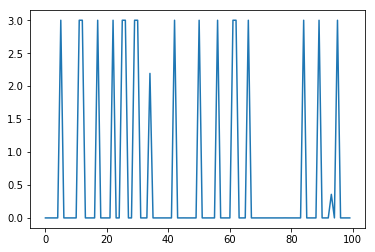

In [12]:
plt.subplot(111)
x_data = [i for i in range(len(yy))]

plt.plot(x_data,[i[0] for i in l2_error.value(dict([(ws,weights), (ws2, weights2)])).tolist()])
plt.show()

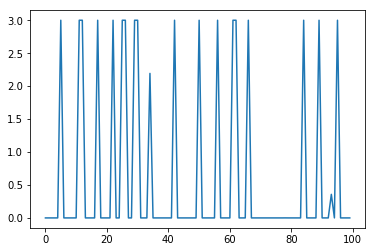

In [13]:
plt.plot(x_data,yy)
plt.show()